## What is Spam ? 

Spam is any **kind of unwanted, unsolicited digital communication that gets sent out in bulk. Often spam is sent via email,** 
but it can also be **distributed via text messages, phone calls, or social media.**

## How Spam Classification works ?

**Naive Bayes classifiers are a popular statistical technique of e-mail filtering.** They typically use **bag-of-words features to identify spam e-mail, an approach commonly used in text classification** . It is one of the oldest ways of doing spam filtering, with roots in the 1990s.

### Work flow of this project :

**1.Data Cleaning** 

**2.EDA** 

**3.Text Preprocessing** 

**4.Model Building**

**5.Model Evaluation** 

**6.Website Building** 

**7.Model Deployment**

In [1]:
# Import required Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset to the system

dataset = pd.read_csv("spam.csv")
print("Data Imported Successfully!!!!!")

Data Imported Successfully!!!!!


### 1. Data Cleaning :

In [3]:
# Observe the dataset head.

dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# check shape of the dataset (rows x colms)

print("The shape of the datatset is :",dataset.shape)

The shape of the datatset is : (5572, 5)


In [5]:
# check the total no. of NA values in each attributes .

dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# check the total duplicate rows in a dataset.

print("Total Duplicate rows in a dataset :",dataset.duplicated().sum())

Total Duplicate rows in a dataset : 403


In [7]:
# check the datatype information of the dataset .

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop the duplicates as this will confuse our model and might be create bias or inbalance training .

dataset = dataset.drop_duplicates(keep="first") # keep = "first" : Drop duplicates except for the first occurrence. 

In [9]:
# Drop the unwanted attributes coz we only need 1.text messages and 2. Spam or Ham and it has more NA values (80-90%) of dataset

dataset = dataset.drop(["Unnamed: 2" ,"Unnamed: 3" ,"Unnamed: 4"] , axis = 1) # axis = 1 : column ; axis = 0 : rows

In [10]:
#  check the shape and duplicated values again ( null values was zeros in both v1 and v2)

print("Shape after drop columns of the dataset :" , dataset.shape)
print("Total no. of Duplicated Values in the dataset after drop duplicated : " ,dataset.duplicated().sum()) 

Shape after drop columns of the dataset : (5169, 2)
Total no. of Duplicated Values in the dataset after drop duplicated :  0


In [11]:
# change the name of columns v1 and v2 as result and text to make it more readable 

dataset.rename(columns={"v1":"results" ,"v2":"texts"} , inplace =True)
dataset.head(5)

,results,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# since the result are in textual form + its binary so we can use label encoding (1:  spam  ; 0: NO spam)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset["results"] = lb.fit_transform(dataset["results"])

# check the label encoding 
dataset.head(5)

,results,texts
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 2. EDA :

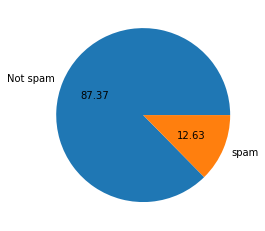

In [13]:
# 1. Check the distribution of spam and not spam in a dataset via pie chart .

plt.pie(dataset["results"].value_counts() , autopct="%0.2f" , labels=["Not spam" , "spam"])
plt.show()

# we can clearly see 87% ~ Not spam and 13% ~ Spam messages are present 
# so data is hihly inbalanced and we need to keep this in mind while training.

In [14]:
# install nltk like this
!pip install nltk

In [15]:
# import nltk and its dependency 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# 2. as we have only two columns it becomes difficult to analyse deeply via Graphical viz so we will  create 3 more colms
# those are 1. No_of_chars 2.No_of_words 3.No_of sents .

# calculate the total characeters in a sentence includes alpha numerics and puncts.
dataset["No_of_chars"] = dataset["texts"].apply(len)

# calculate the total no. of words in a sentence using word tokenize from nltk
dataset["No_of_words"] = dataset["texts"].apply(lambda x : len(nltk.word_tokenize(x)))

# calculate the total no. of sentence in a text  using sentence tokenize from nltk
dataset["No_of_sent"] = dataset["texts"].apply(lambda x : len(nltk.sent_tokenize(x)))

# preview what we had  actaully achieved by all this
dataset.head(5)

,results,texts,No_of_chars,No_of_words,No_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# check out the statistical observation of the text which is not spam.

dataset[dataset["results"] == 0][["No_of_chars" ,"No_of_words" ,"No_of_sent"]].describe()

# Following observation w.r.t spam messages displayed below  ( Statistical Breakdown):

# 1. Mean of spam messages is almost double than not spam messages wheather it is Number of chars , words or sents.
# 2. std is of spam messages is approx half of not spam messages since the text in spam is very usual so it is always repeatable in nature.
# 3. Min of spam is more than not spam in No. of character may be they repeat spme specific words 2-3 times eg. Lottery Lottery Lottery etc.
# 4. Usally spam messages have more Number of chars than not spam , which are repeatble .

,No_of_chars,No_of_words,No_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# check out the statistical observation of the text which is not spam.
# check out the statistical breakdown in above cell

dataset[dataset["results"] == 1][["No_of_chars" ,"No_of_words" ,"No_of_sent"]].describe()

,No_of_chars,No_of_words,No_of_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


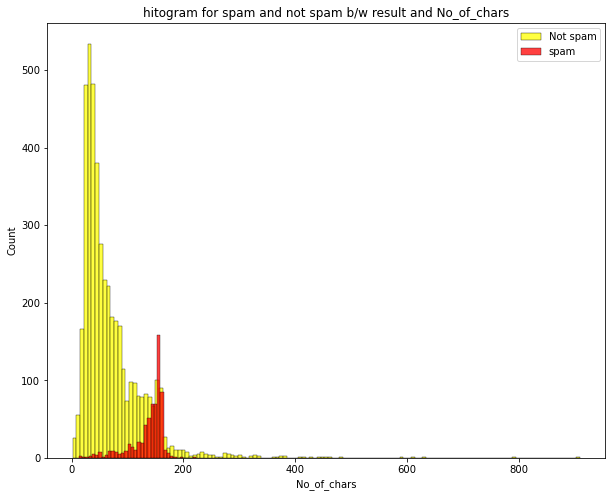

In [19]:
# if somehow you dont understand the statistical breakdown .. then dont worry we will plot those and understand via Viz.

plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["results"] == 0]["No_of_chars"] ,color= "yellow")# hitogram for not spam b/w result and No_of_chars
sns.histplot(dataset[dataset["results"] == 1]["No_of_chars"] , color="red")   # hitogram for spam b/w result and No_of_chars
plt.title("hitogram for spam and not spam b/w result and No_of_chars" )
plt.legend(labels = ["Not spam" , "spam"])
plt.show()

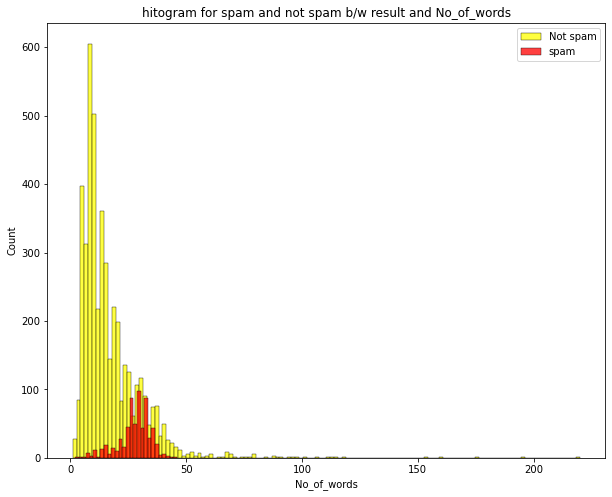

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["results"] == 0]["No_of_words"] ,color= "yellow")# hitogram for not spam b/w result and No_of_words
sns.histplot(dataset[dataset["results"] == 1]["No_of_words"] , color="red")   # hitogram for spam b/w result and No_of_words
plt.title("hitogram for spam and not spam b/w result and No_of_words" )
plt.legend(labels = ["Not spam" , "spam"])
plt.show()

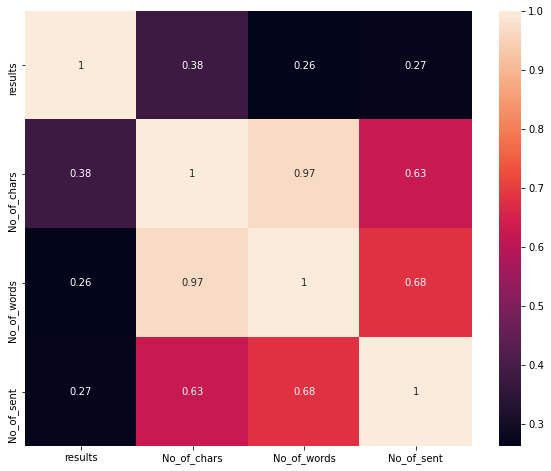

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Heatmap Breakdown :

# 1. Result is highly influneced by No_of_char by 38% as we have already seen in statistical breakdown.
# 2. Result is least influneced by No_of_words by 26% as we have already seen in statistical breakdown.

### Data ( Text ) Preprocessing : 

In [22]:
# So 3 stage ofthe project. Here we use the concept of NLP sincedata is textual ,I recommend you to go through my NLP Notebook once
# upload in the github ( repo : ML and Dl notes )

# Plan of attack :

# Step 1 : Convert / tranformed text building  a function via ( which has a following steps) 
# 1.Lowercase 2.Tokenization 3.Remove special words 4.Remove stopwords and puncts 5.stemming

# Step 2 : Build a word cloud or a histogram of top 30 in spam and not spam.

# Step 3 : Implement above Step 1 and Step 2 and move to Stage 4  ( Model Building)

In [23]:
# Step 1 : Build a tranformed_text function :

def text_preprocesing(text):
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenizse
    text = nltk.word_tokenize(text)
    
    list = []   # since text is already tokenized and lowercase , below code will remove special chars and store into list
    
    # 3. Remove special words
    for i in text :
        if i.isalnum():
            list.append(i)
       
    text = list[:] # since list is filled with text with no special chars and lowez and tokz it will again clone to text
    list.clear()   # and it will be clear to append new tranformed text with no stopword and puncts
    
    # 4. Remove stopwords and puncts
    
    from nltk.corpus import stopwords
    import string
    
    for i in text:
        if i  not in stopwords.words('english') and i not in string.punctuation:
            list.append(i)
     
    text = list[:] # again same , list is filled with text with no special chars with no stopword and puncts and lowez and tokz it will again clone to text
    list.clear() # and it will be clear to append new tranformed text with stemmed words
    
    # 5. stemming
    
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    
    for i in text:
        list.append(ps.stem(i))
    
    
    return " ".join(list)
    
            

In [24]:
# make a sep colum named as tranformed_text in a dataset for this processed text ( data)

dataset["tranformed_text"] = dataset["texts"].apply(text_preprocesing)

# previw the dataset after adding new attribute
dataset.head(5)

,results,texts,No_of_chars,No_of_words,No_of_sent,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [25]:
# remaining word cloud and top 30 histogram chart

In [26]:
# This is an optional task if anybody want to explore more via Viz about new tranformed text 

# Step 2 : Build a word cloud or a histogram of top 30 in spam and not spam.

from wordcloud import WordCloud
wc = WordCloud (width=500 , height= 500 ,min_font_size=10,background_color='white')
# prepared a varible with certain parameters . Now implement this on spam and ham ( not spam)

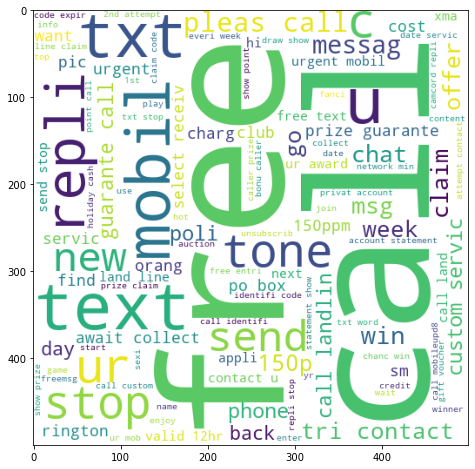

In [27]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["results"] == 1 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

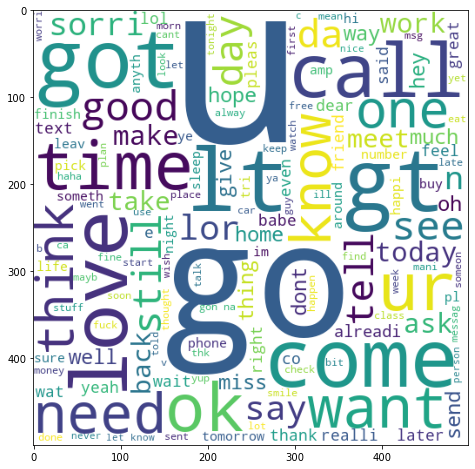

In [28]:
# Repeat the same procedure for not Spam message top words ( or most frequent words used) in tranformed text
not_spam_wc = wc.generate(dataset[dataset["results"] == 0 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(not_spam_wc)
plt.show()

In [29]:
# Now if this word cloud doesnt provide enough knowlegde of top word used we can use histogram to plot words vs  counts (top 30)

# first we have to seperate each word from the sentence in transformed text ( tokenized it ) and stored as an element in a list
# second we have to build a function to perform first task and append in list.
# third we have to count top 30 using pre wriiten function 
# lastly we have to plot it


spam_words_list = []
for msg in dataset[dataset["results"] == 1]["tranformed_text"].tolist() : # tolist() function return a list of the values.
    for word in msg.split():
        spam_words_list.append(word)

print("The total no. of words in Spam messages are :" ,len(spam_words_list))

The total no. of words in Spam messages are : 9941


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


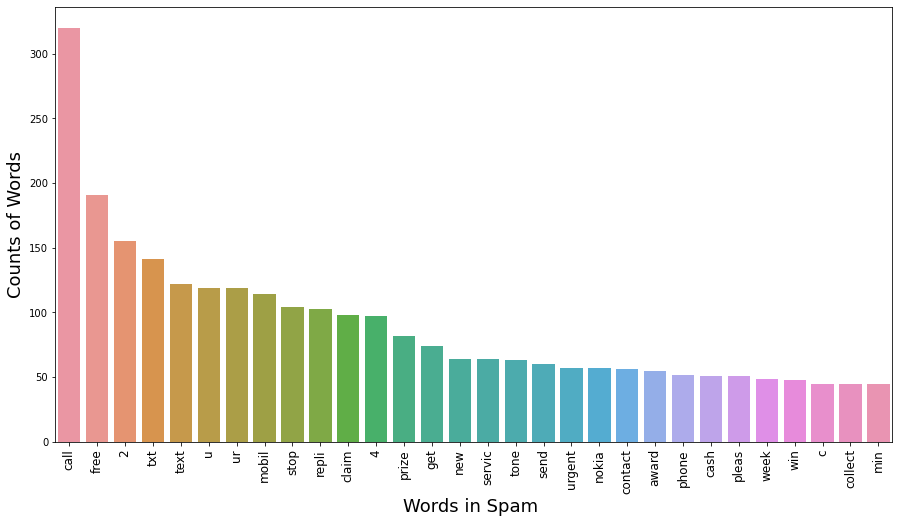

In [30]:
# to plot top 30 words in spam messages : 

from collections import Counter

plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(spam_words_list).most_common(30))[0],pd.DataFrame(Counter(spam_words_list).most_common(30))[1])
plt.xticks(rotation='vertical' ,fontsize=12)
plt.xlabel("Words in Spam " ,fontsize=18)
plt.ylabel("Counts of Words" ,fontsize=18)
plt.show()

In [31]:
# similarily perform for non spam messages 

non_spam_words_list = []
for msg in dataset[dataset["results"] == 0]["tranformed_text"].tolist() : # tolist() function return a list of the values.
    for word in msg.split():
        non_spam_words_list.append(word)

print("The total no. of words in Non Spam messages are :" ,len(non_spam_words_list))

The total no. of words in Non Spam messages are : 35303


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


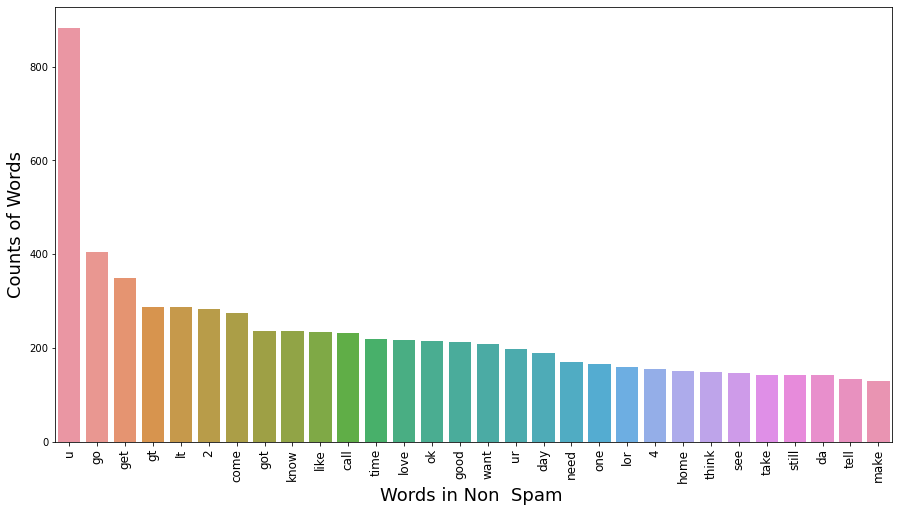

In [32]:
# to plot top 30 words in spam messages : 

from collections import Counter

plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(non_spam_words_list).most_common(30))[0],pd.DataFrame(Counter(non_spam_words_list).most_common(30))[1])
plt.xticks(rotation='vertical' ,fontsize=12)
plt.xlabel("Words in Non  Spam " ,fontsize=18)
plt.ylabel("Counts of Words" ,fontsize=18)
plt.show()

### 4. Model Building :

In [33]:
# Now lets head to step / stage 4 ... Finally building a model using some famous algorithms for text calssification.
# by default naives bayes is preferly or argubelythe best with Multinomial and binomial distribution but we will still look
# to other algoriths as well

# Point to remember here our prime priority will be precision more than accuracy since in text classification bcoz 
# Precision refers to how close measurements of the same item are to each other while 
# Accuracy refers to the closeness of a measured value to a standard or known value. ..

# before heading lets split the data in input (tranaformed text) and output ( results) using Bags of words and TF-IDF

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

X_cv    = cv.fit_transform(dataset["tranformed_text"]).toarray()
X_tfidf = tfidf.fit_transform(dataset["tranformed_text"]).toarray() 

y = dataset["results"]

# Note toarray() is important bcoz Matrices that contain mostly zero values are called sparse (our data),
# distinct from matrices where most of the values are non-zero, called dense

# otherwise this error will be seen "A sparse matrix was passed, but dense data is required.
# Use X.toarray() to convert to a dense numpy array."

print("Shape of X in count Vectorizer is : " , X_cv.shape) # shape ( rows X freq words)
print("------------------------------------------------------")
print("Shape of X in TF-IDF is : " , X_tfidf.shape)
print("------------------------------------------------------")
print("Shape of y is : ", y.shape)

Shape of X in count Vectorizer is :  (5169, 6677)
------------------------------------------------------
Shape of X in TF-IDF is :  (5169, 3000)
------------------------------------------------------
Shape of y is :  (5169,)


In [34]:
# as usual before feeding to any algo we need  to split the dataset intop train and test but using count vectorizers only

from sklearn.model_selection import train_test_split
X_cv_train ,X_cv_test , y_train , y_test = train_test_split(X_cv , y , test_size=0.2 , random_state= 0)

In [35]:
#  again before feeding to any algo we need  to split the dataset intop train and test but this time using TF-IDF only

from sklearn.model_selection import train_test_split
X_tfidf_train ,X_tfidf_test , y_train , y_test = train_test_split(X_tfidf , y , test_size=0.2 , random_state= 0)

In [36]:
# so let us  start with naive bayes then we will head to rest algos.

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

# create an object of this distributuions
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


print("Gaussian Distributuion ")

print("                                                                      ")
gnb.fit(X_cv_train,y_train)
y_pred_cv_gnb = gnb.predict(X_cv_test)
print("accuracy of GNB in cv is :",accuracy_score(y_test,y_pred_cv_gnb)*100)
print("Confsuion matrix of GNB in cv is :\n" , confusion_matrix(y_test,y_pred_cv_gnb))
print("precision of GNB in cv is :",precision_score(y_test,y_pred_cv_gnb)*100)

print("---------------------------------------------------------------")

gnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_gnb = gnb.predict(X_tfidf_test)
print("accuracy of GNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_gnb)*100)
print("Confsuion matrix of GNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_gnb))
print("precision of GNB in tfidf is :",precision_score(y_test,y_pred_tfidf_gnb)*100)


print("------------------------------------------------------")


print("Multinomial Distrubution")

print("                                                                      ")
mnb.fit(X_cv_train,y_train)
y_pred_cv_mnb = mnb.predict(X_cv_test)
print("accuracy of MNB in cv is :",accuracy_score(y_test,y_pred_cv_mnb)*100)
print("Confsuion matrix of MNB in cv is :\n" , confusion_matrix(y_test,y_pred_cv_mnb))
print("precision of MNB in cv is :",precision_score(y_test,y_pred_cv_mnb)*100)

print("---------------------------------------------------------")

mnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_mnb = mnb.predict(X_tfidf_test)
print("accuracy of MNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_mnb)*100)
print("Confsuion matrix of MNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_mnb))
print("precision of MNB in tfidf is :",precision_score(y_test,y_pred_tfidf_mnb)*100)

print("------------------------------------------------------")


print("Bernoulii Distrubution") 

print("                                                                      ")
bnb.fit(X_cv_train,y_train)
y_pred_cv_bnb = bnb.predict(X_cv_test)
print("accuracy of BNB in cv is :",accuracy_score(y_test,y_pred_cv_bnb)*100)
print("Confsuion matrix of BNB in cv is :\n" , confusion_matrix(y_test,y_pred_cv_bnb))
print("precision of BNB in cv is :",precision_score(y_test,y_pred_cv_bnb)*100)

print("------------------------------------------------------")

bnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_bnb = bnb.predict(X_tfidf_test)
print("accuracy of BNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_bnb)*100)
print("Confsuion matrix of BNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_bnb))
print("precision of BNB in tfidf is :",precision_score(y_test,y_pred_tfidf_bnb)*100)


# Note : After run the cell  TF-IDF in Naive bayes with Multinomial Dist is accpeted with Accuracy : 96.8 % & Precision = 100% 

Gaussian Distributuion 
                                                                      
accuracy of GNB in cv is : 87.52417794970987
Confsuion matrix of GNB in cv is :
 [[773 112]
 [ 17 132]]
precision of GNB in cv is : 54.09836065573771
---------------------------------------------------------------
accuracy of GNB in tfidf is : 87.04061895551257
Confsuion matrix of GNB in tfidf is :
 [[773 112]
 [ 22 127]]
precision of GNB in tfidf is : 53.13807531380753
------------------------------------------------------
Multinomial Distrubution
                                                                      
accuracy of MNB in cv is : 97.09864603481626
Confsuion matrix of MNB in cv is :
 [[869  16]
 [ 14 135]]
precision of MNB in cv is : 89.40397350993378
---------------------------------------------------------
accuracy of MNB in tfidf is : 96.80851063829788
Confsuion matrix of MNB in tfidf is :
 [[885   0]
 [ 33 116]]
precision of MNB in tfidf is : 100.0
--------------------------

### Model Evaluation :

In [37]:
# welcome to stage 5 where we evalute the model with more algos and check is there any algo which can beat our previous algo

# Step 1 : Import all algos 


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Step 2 : Tune all the paarametes of algos ( your choice )

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


# Step 3 : Prepare a dictionary for this algo , so it would become easy while making dataframe of Algos, accuracy snd precision
# also whilefeeding to the function . 

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


# Step 4 : Build a function .

def train_classifier(clf,X_tfidf_train,y_train,X_tfidf_test,y_test):
    clf.fit(X_tfidf_train,y_train)
    y_pred_algo = clf.predict(X_tfidf_test)
    accuracy = accuracy_score(y_test,y_pred_algo)
    precision = precision_score(y_test,y_pred_algo)
    
    return accuracy ,precision

# train the model .

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_tfidf_train,y_train,X_tfidf_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
# Step 6 : Preview in a Dataset .

Performance_algos = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
Performance_algos



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.968085,1.000000
5,RF,0.977756,0.992188
8,ETC,0.975822,0.992063
0,SVC,0.974855,0.984252
10,xgb,0.972921,0.976378
6,AdaBoost,0.970019,0.975806
4,LR,0.962282,0.974138
9,GBDT,0.957447,0.964602
7,BgC,0.957447,0.867133


In [38]:
# After this still  TF-IDF in Naive bayes with Multinomial Dist is accpeted with Accuracy : 96.8 % & Precision = 100%
# is winner , i encourage you to try voting classiifer and stacking and observe wheather they are performing good enough than
# Naive bayes or not 

In [39]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [40]:
# So this was it next code will on vscode for app building

### Website Building and Model Deployment 